
##**TITLE: STROKE DETECTION AND ANALYSIS USING ML ALGORITHMS**


In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
#LOADING THE DATASET
filePath = "/content/healthcare-dataset-stroke-data.csv"
data = pd.read_csv(filePath)

print("Data shape: {}".format(data.shape))

with pd.option_context('expand_frame_repr', False):
    print(data.head())# Take a quick peek, few rows, at the data using the head method in Pandas


Data shape: (5110, 12)
      id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  avg_glucose_level   bmi   smoking_status  stroke
0   9046    Male  67.0             0              1          Yes        Private          Urban             228.69  36.6  formerly smoked       1
1  51676  Female  61.0             0              0          Yes  Self-employed          Rural             202.21   NaN     never smoked       1
2  31112    Male  80.0             0              1          Yes        Private          Rural             105.92  32.5     never smoked       1
3  60182  Female  49.0             0              0          Yes        Private          Urban             171.23  34.4           smokes       1
4   1665  Female  79.0             1              0          Yes  Self-employed          Rural             174.12  24.0     never smoked       1


In [3]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
## generate descriptive statistics which is very helpful
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
#handling missing values
missingValues = data.isnull().sum()/len(data)*100
print(missingValues)

print("Missing values in bmi\t\t: {:.2f}%".format(missingValues['bmi']))
print("Missing values in smoking_status\t: {:.2f}%".format(missingValues['smoking_status']))
print("Shape of data with missing values: {}".format(data.shape))

# Safely disable new warning with the chained assignment.
pd.options.mode.chained_assignment = None  # default='warn'
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())
# remove (drop) data associated with missing values in variable 'smoking_status'
transformed_data = data[data['smoking_status'].notnull()]
# drop variable 'id'
transformed_data.drop(columns='id',axis=1,inplace=True)
# validate there's no more missing values
missingValues = transformed_data.isnull().sum()/len(transformed_data)*100
print(missingValues)
print("Missing values in 'bmi'\t\t: {}".format(missingValues['bmi']))
print("Missing values in 'smoking_status'\t: {}".format(missingValues['smoking_status']))
print("Shape of data without missing values: {}".format(transformed_data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
Missing values in bmi		: 3.93%
Missing values in smoking_status	: 0.00%
Shape of data with missing values: (5110, 12)
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
Missing values in 'bmi'		: 0.0
Missing values in 'smoking_status'	: 0.0
Shape of data without missing values: (5110, 11)


In [6]:
#USAGE OF LABEL ENCODER
for categVariable in ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]:
  print("Unique values of {}: {}".format(categVariable, transformed_data[categVariable].unique()))
  label_encoder = LabelEncoder()
  transformed_data[categVariable] = label_encoder.fit_transform(transformed_data[categVariable])

print("\nData with encoded Categorical variable: ")

with pd.option_context('expand_frame_repr', False):
    print(transformed_data.head())

Unique values of gender: ['Male' 'Female' 'Other']
Unique values of ever_married: ['Yes' 'No']
Unique values of work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type: ['Urban' 'Rural']
Unique values of smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']

Data with encoded Categorical variable: 
   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level        bmi  smoking_status  stroke
0       1  67.0             0              1             1          2               1             228.69  36.600000               1       1
1       0  61.0             0              0             1          3               0             202.21  28.893237               2       1
2       1  80.0             0              1             1          2               0             105.92  32.500000               2       1
3       0  49.0             0              0             1          2   

**EDA(Exploratory Data Analysis)**

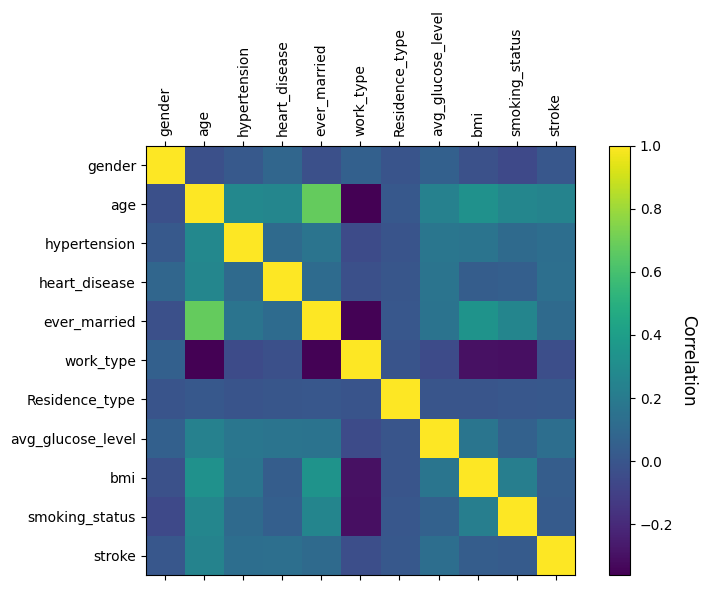

In [7]:
# correlation plot and hist plot
fig, axes = plt.subplots(figsize=(8,6))
image = axes.matshow(transformed_data.corr())

axes.set_xticks(np.arange(transformed_data.shape[1]))
axes.set_yticks(np.arange(transformed_data.shape[1]))
axes.set_xticklabels(transformed_data.columns,rotation=90)
axes.set_yticklabels(transformed_data.columns)

cbar = axes.figure.colorbar(image, ax=axes)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
plt.show()



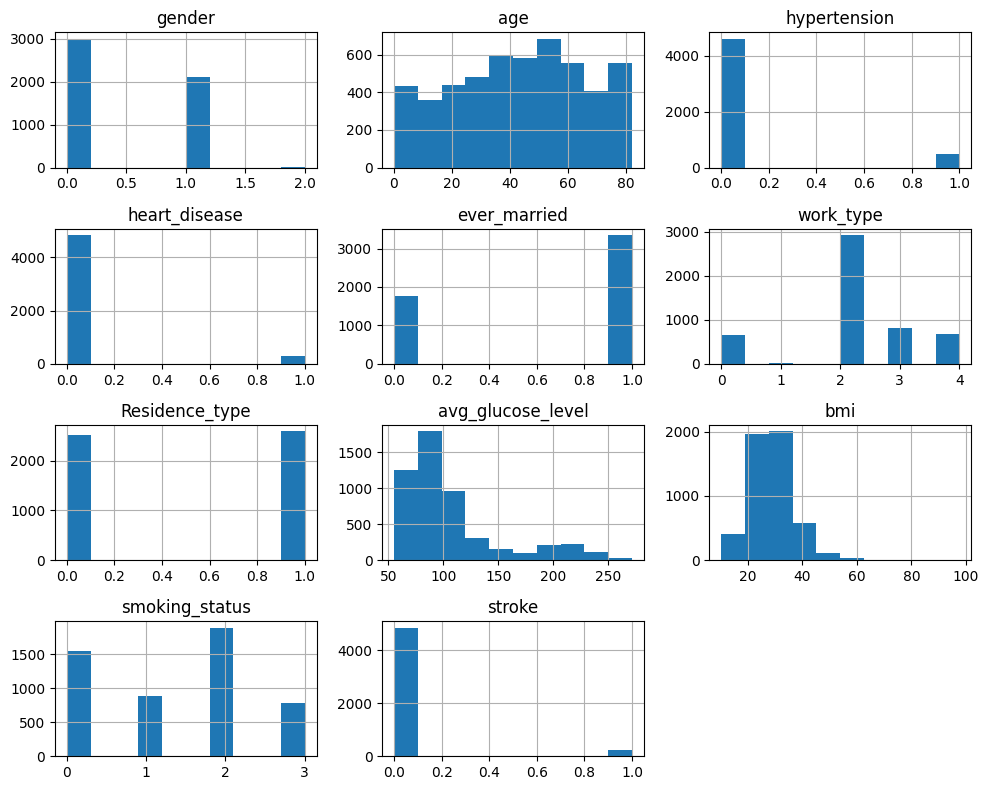

In [8]:
fig = transformed_data.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

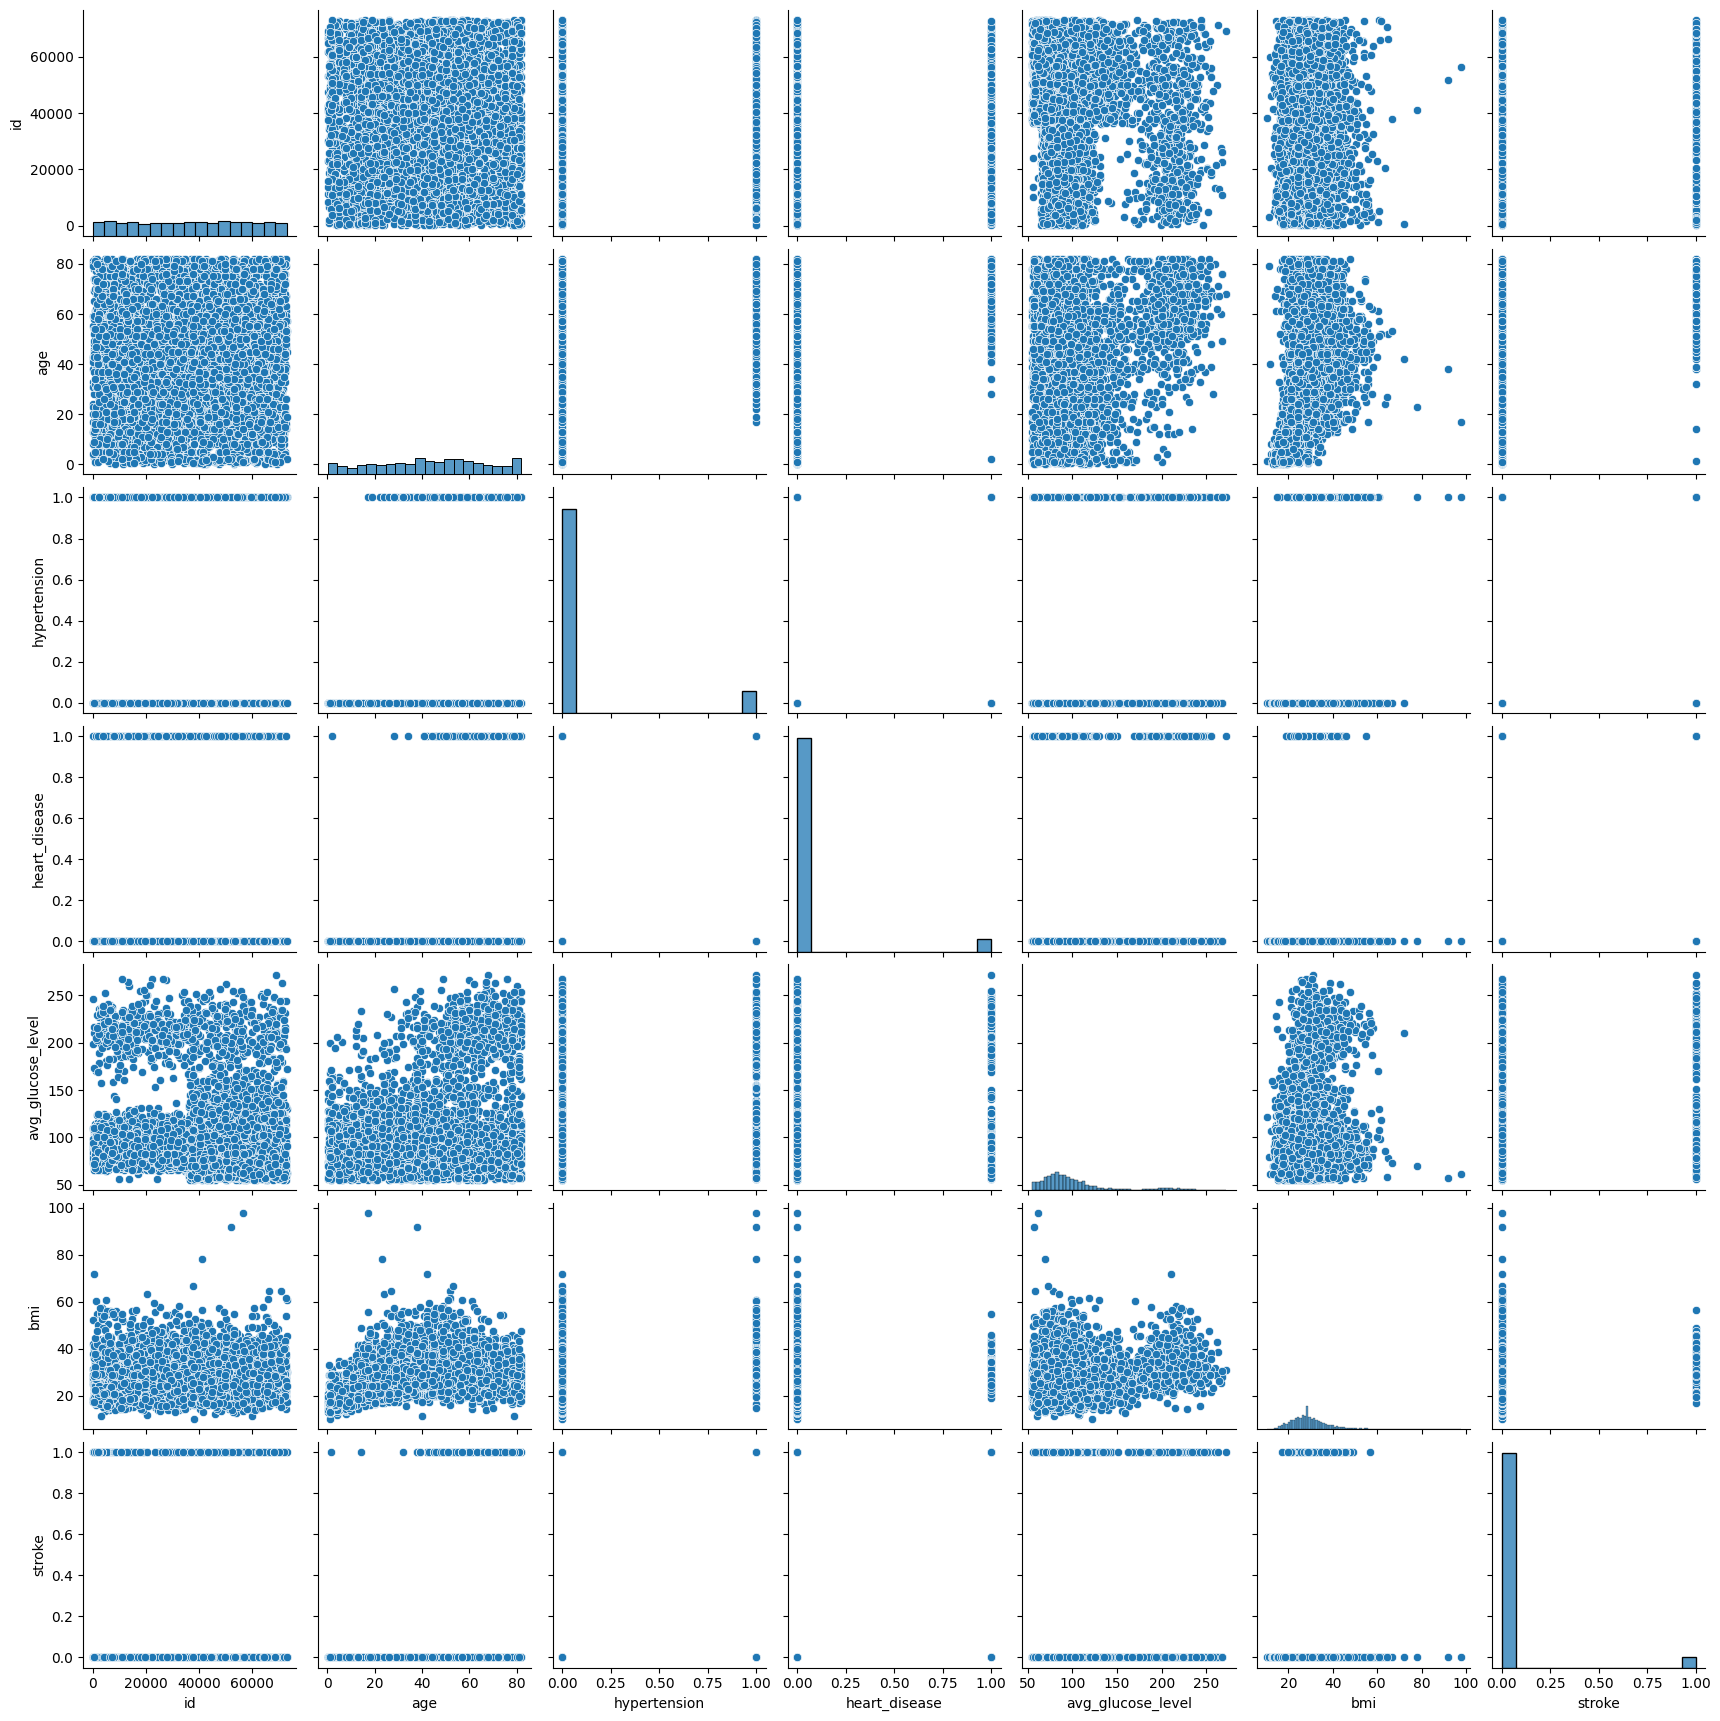

In [9]:
import seaborn as sns
sns.pairplot(data)

## are there any correlations among the features

In [10]:
#representing each column in the dataset
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<ipython-input-11-8c5cd4ae4c09>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'] , color="red", ax=axes[0, 0])
<ipython-input-11-8c5cd4ae4c09>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'] , color="olive", ax=axes[0, 1])
<ipython-input-11-8c5cd4ae4c09>:5: UserWarning: 

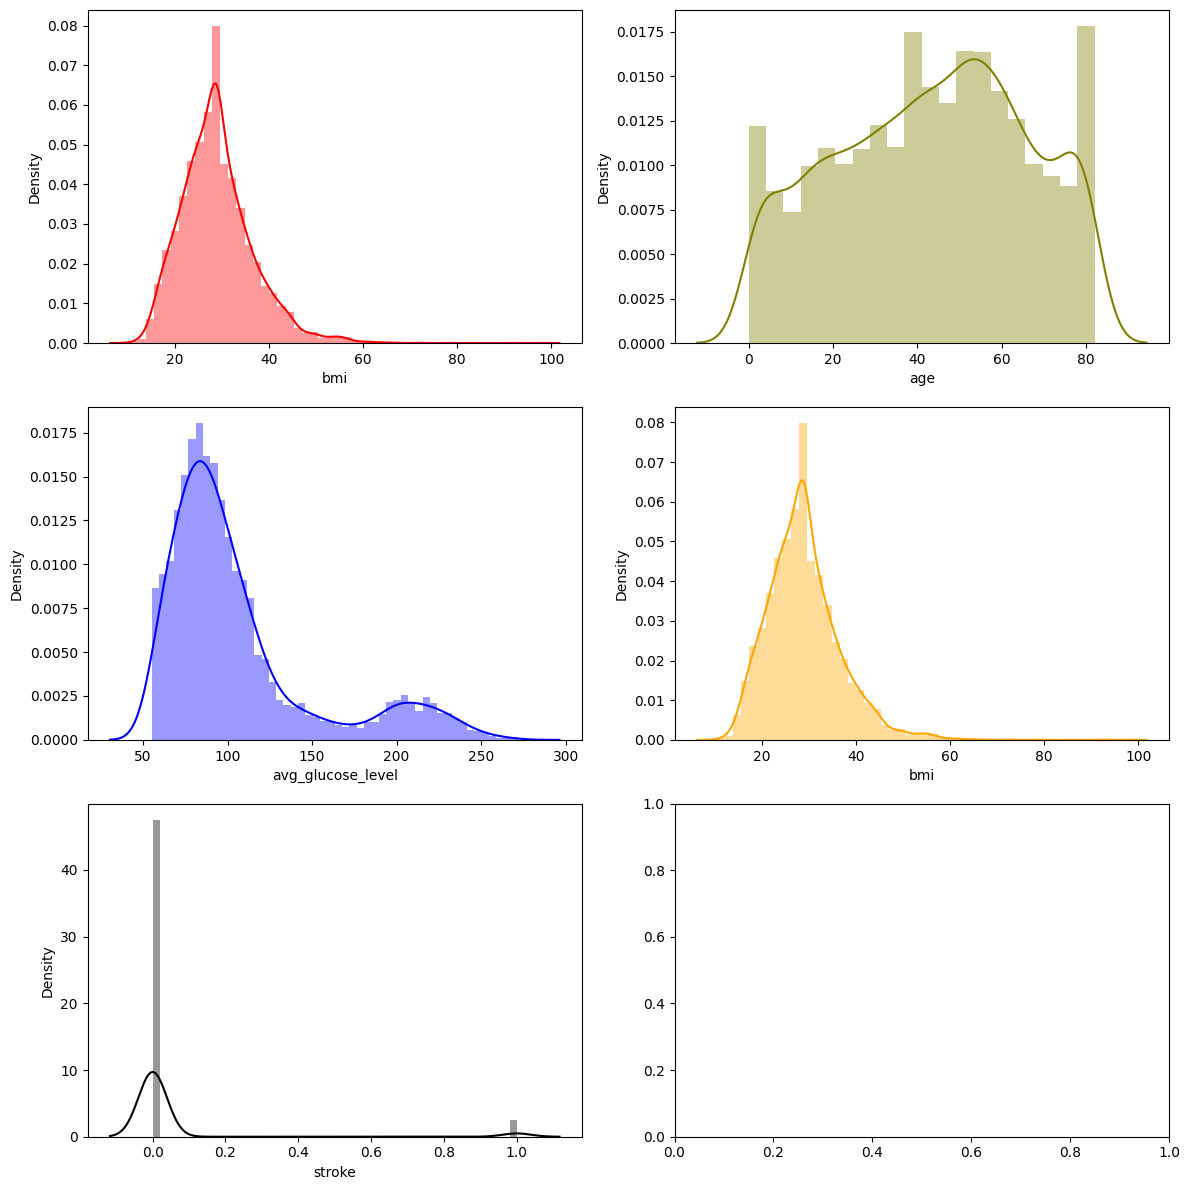

In [11]:
#plotting the distplot for few columns
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.distplot(data['bmi'] , color="red", ax=axes[0, 0])
sns.distplot(data['age'] , color="olive", ax=axes[0, 1])
sns.distplot(data['avg_glucose_level'] , color="blue", ax=axes[1, 0])
sns.distplot(data['bmi'] , color="orange", ax=axes[1, 1])
sns.distplot(data['stroke'] , color="black", ax=axes[2, 0])

plt.tight_layout()

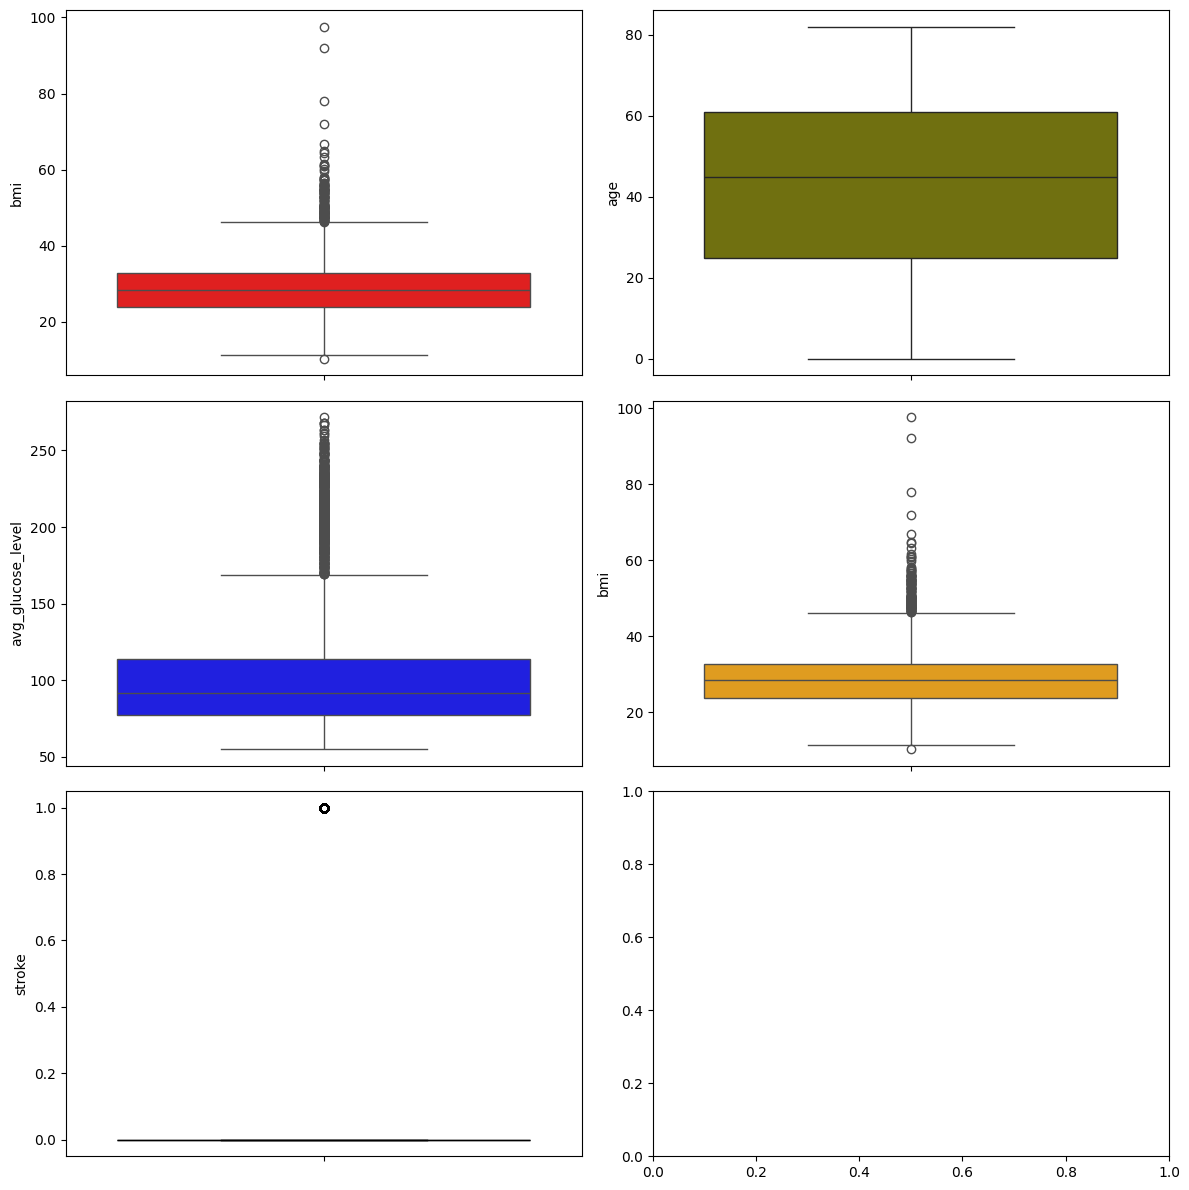

In [12]:
#plotting the boxplot to  know the outliers
f, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.boxplot(data['bmi'] , color="red", ax=axes[0, 0])
sns.boxplot(data['age'] , color="olive", ax=axes[0, 1])
sns.boxplot(data['avg_glucose_level'] , color="blue", ax=axes[1, 0])
sns.boxplot(data['bmi'] , color="orange", ax=axes[1, 1])
sns.boxplot(data['stroke'] , color="black", ax=axes[2, 0])

plt.tight_layout()

<ipython-input-13-41b11a7ae6e4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='spearman')


<Axes: >

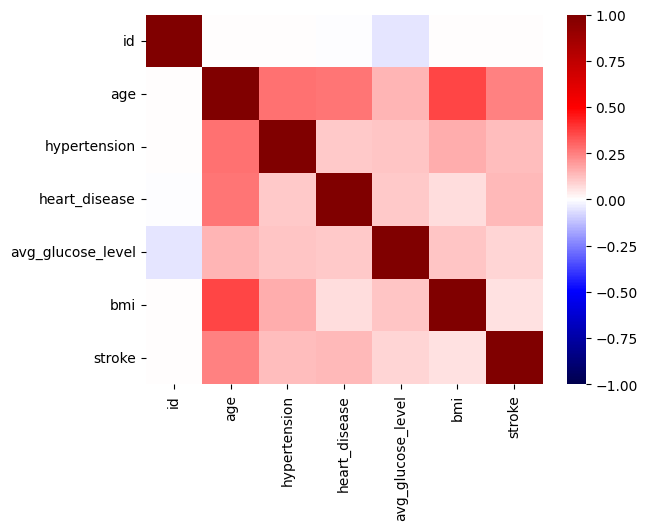

In [13]:
# calculate the correlation matrix
corr = data.corr(method='spearman')

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,center=0, vmin=-1, vmax=1,cmap='seismic')

<Axes: >

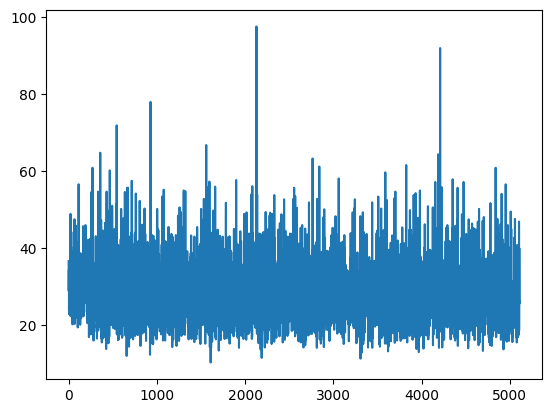

In [14]:
#plotting bmi

import matplotlib.pyplot as plt
data['bmi'].plot()

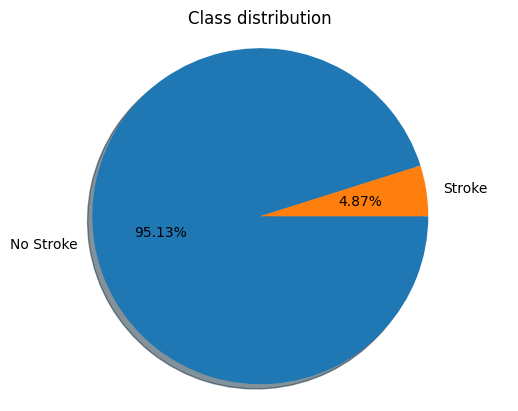

Samples associated with no stroke: 4861
Samples associated with stroke: 249


In [15]:
#class distribution, pie plot Showing samples associated with strokes

label_count = transformed_data['stroke'].value_counts()
label_names = ['No Stroke','Stroke']
fig, axes = plt.subplots()
axes.pie(label_count, labels=label_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
axes.axis('equal')
axes.set_title('Class distribution')
plt.show()

print("Samples associated with no stroke: {}".format(label_count[0]))
print("Samples associated with stroke: {}".format(label_count[1]))

In [16]:
#data processing
# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_resample(transformed_data.loc[:,transformed_data.columns!='stroke'], transformed_data['stroke'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (9722, 10)
Shape of y: (9722,)


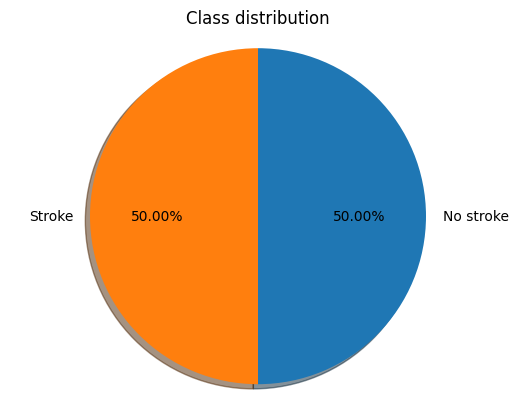

Samples associated with no stroke: 4861
Samples associated with stroke: 4861


In [17]:
_, label_counts = np.unique(y, return_counts=True)
label_names = ['No stroke', 'Stroke']
fig, axes = plt.subplots()
axes.pie(label_counts, labels=label_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
axes.axis('equal')
axes.set_title('Class distribution')
plt.show()

print("Samples associated with no stroke: {}".format(label_counts[0]))
print("Samples associated with stroke: {}".format(label_counts[1]))

In [18]:
#DATA SPLITTING
test_size=0.1
random_state=42

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=random_state, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=test_size/(1-test_size), random_state=random_state, stratify=y_train)
# X_train, X_valid, X_test, y_train, y_valid, y_test = dataSplit(X,y,test_size=0.1,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

print("Training Data :: class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("Validation Data :: class 0: {} | # class 1: {}".format(valid_counts[0],valid_counts[1]))
print("Testing Data :: class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

Training Data :: class 0: 3888 | # class 1: 3888
Validation Data :: class 0: 486 | # class 1: 487
Testing Data :: class 0: 487 | # class 1: 486


In [19]:
#data normalization
scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)
X_test_std = scaler.transform(X_test)

In [20]:
#performance matrices
def get_Sensitivity_Specificity(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [21]:
#Implementation of different models
def model_Summary(modelName, test_y, predicted_y, predicted_y_prob):
  # ml_names.append(modelName)
  print("Summary for model :: "+modelName)
  print("Classification report: \n{}".format(classification_report(test_y,predicted_y)))
  print("Confusion matrix: \n{}".format(confusion_matrix(test_y,predicted_y)))
  print("Accuracy score: {:.2f}".format(accuracy_score(test_y,predicted_y)))
  # calculate precision, recall, and f1 scores
  precision = precision_score(test_y,predicted_y)
  recall = recall_score(test_y,predicted_y)
  f1_scores = f1_score(test_y,predicted_y)
  print("Precision score: {:.2f}".format(precision))
  print("Recall score: {:.2f}".format(recall))
  print("F1 score: {:.2f}".format(f1_scores))
  # calculate sensitivity, specificity, and auc
  sensitivity,specificity = get_Sensitivity_Specificity(test_y,predicted_y)
  fpr, tpr, _ = roc_curve(test_y,  predicted_y_prob[:,1])
  auc = roc_auc_score(test_y, predicted_y_prob[:,1])
  print("Sensitivity score: {:.2f}".format(sensitivity))
  print("Specitivity score: {:.2f}".format(specificity))
  print("AUC score: {:.2f}".format(auc))
  fig, axes = plt.subplots()
  axes.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
  axes.plot([0, 1], [0, 1], color='green', linestyle='--')
  axes.set_xlim([-0.05, 1.0])
  axes.set_ylim([0.0, 1.05])
  axes.set_xlabel('False Positive Rate')
  axes.set_ylabel('True Positive Rate')
  axes.set_title('Receiver Operating Characteristic -- '+modelName)
  axes.legend(loc="lower right")
  plt.show()
  return precision, recall, f1_scores, sensitivity, specificity, auc

##**Implementing the models**

#SVM

Finished training within 9.14 seconds
Summary for model :: SVM
Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       487
           1       0.85      0.91      0.88       486

    accuracy                           0.87       973
   macro avg       0.87      0.87      0.87       973
weighted avg       0.87      0.87      0.87       973

Confusion matrix: 
[[409  78]
 [ 46 440]]
Accuracy score: 0.87
Precision score: 0.85
Recall score: 0.91
F1 score: 0.88
Sensitivity score: 0.91
Specitivity score: 0.84
AUC score: 0.94


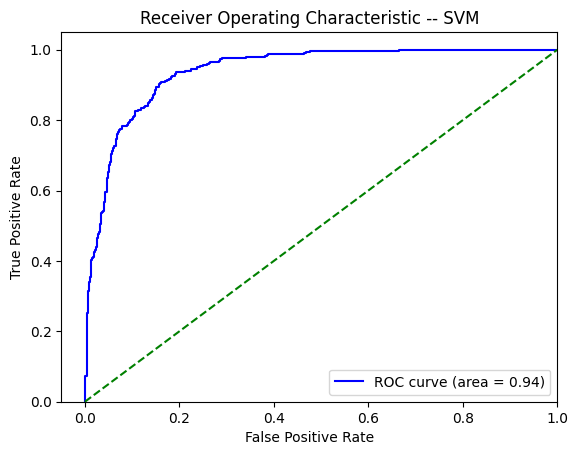

In [22]:
#Implementing the SVM Model
start = timer.time()
svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))


y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

prec_svm, rec_svm, f1_svm, sens_svm, spec_svm, auc_svm = model_Summary("SVM", y_test, y_svm, y_svm_prob)

#Gaussian

Finished training within 0.00 seconds
Summary for model :: GNB
Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.74      0.80       487
           1       0.77      0.88      0.82       486

    accuracy                           0.81       973
   macro avg       0.82      0.81      0.81       973
weighted avg       0.82      0.81      0.81       973

Confusion matrix: 
[[362 125]
 [ 60 426]]
Accuracy score: 0.81
Precision score: 0.77
Recall score: 0.88
F1 score: 0.82
Sensitivity score: 0.88
Specitivity score: 0.74
AUC score: 0.89


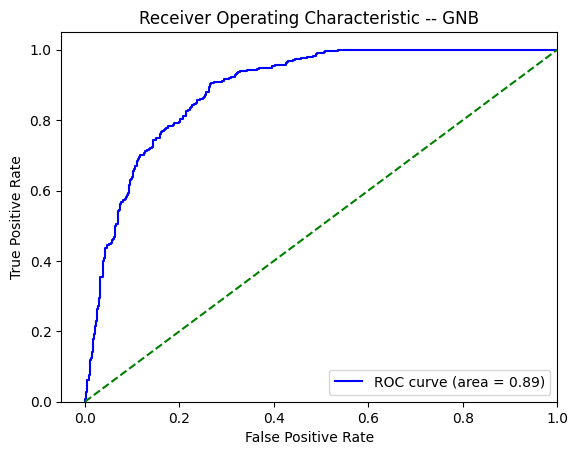

In [23]:
#Implementing the Gaussian Model
start = timer.time()
gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

prec_gnb, rec_gnb, f1_gnb, sens_gnb, spec_gnb, auc_gnb = model_Summary("GNB", y_test, y_gnb, y_gnb_prob)


#LOGISTIC REGRESSION

Finished training within 0.02 seconds
Summary for model :: LR
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       487
           1       0.81      0.82      0.81       486

    accuracy                           0.81       973
   macro avg       0.81      0.81      0.81       973
weighted avg       0.81      0.81      0.81       973

Confusion matrix: 
[[391  96]
 [ 87 399]]
Accuracy score: 0.81
Precision score: 0.81
Recall score: 0.82
F1 score: 0.81
Sensitivity score: 0.82
Specitivity score: 0.80
AUC score: 0.90


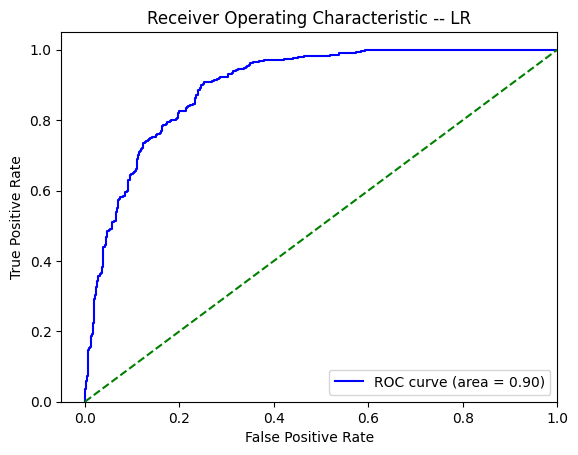

In [24]:
#Implementing the Logistic Regression Model
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

prec_logit, rec_logit, f1_logit, sens_logit, spec_logit, auc_logit = model_Summary("LR",y_test, y_logit, y_logit_prob)

#Decision Tree

Finished training within 0.03 seconds
Summary for model :: DT
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       487
           1       0.91      0.92      0.91       486

    accuracy                           0.91       973
   macro avg       0.91      0.91      0.91       973
weighted avg       0.91      0.91      0.91       973

Confusion matrix: 
[[443  44]
 [ 40 446]]
Accuracy score: 0.91
Precision score: 0.91
Recall score: 0.92
F1 score: 0.91
Sensitivity score: 0.92
Specitivity score: 0.91
AUC score: 0.91


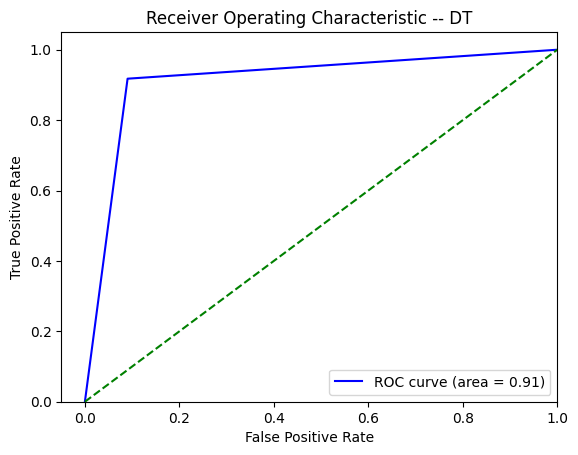

In [25]:
#Implementing the Decision Tree Model
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

prec_dtree, rec_dtree, f1_dtree, sens_dtree, spec_dtree, auc_dtree = model_Summary("DT", y_test, y_dtree, y_dtree_prob)

#Random Forest

Finished training within 0.78 seconds
Summary for model :: RF
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       487
           1       0.95      0.96      0.96       486

    accuracy                           0.96       973
   macro avg       0.96      0.96      0.96       973
weighted avg       0.96      0.96      0.96       973

Confusion matrix: 
[[463  24]
 [ 19 467]]
Accuracy score: 0.96
Precision score: 0.95
Recall score: 0.96
F1 score: 0.96
Sensitivity score: 0.96
Specitivity score: 0.95
AUC score: 0.99


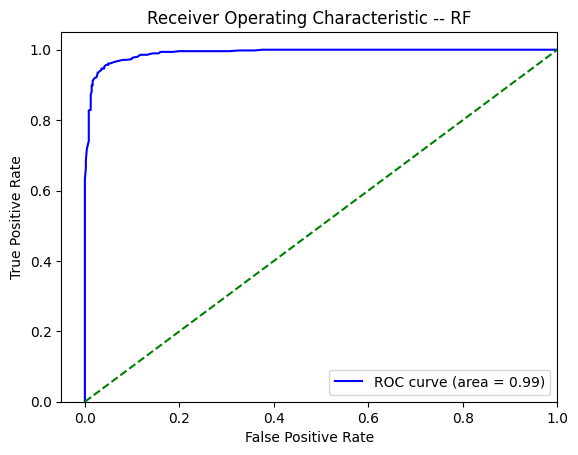

In [26]:
#Implementing the Random Forest Model
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

prec_ranfor, rec_ranfor, f1_ranfor, sens_ranfor, spec_ranfor, auc_ranfor = model_Summary("RF", y_test, y_ranfor, y_ranfor_prob)


#LGBM

[LightGBM] [Info] Number of positive: 3888, number of negative: 3888
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 7776, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Finished training within 0.15 seconds
Summary for model :: LGBM
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       487
           1       0.92      0.97      0.94       486

    accuracy                           0.94       973
   macro avg       0.94      0.94      0.94       973
weighted avg       0.94      0.94      0.94       973

Confusion matrix: 
[[446  41]
 [ 15 471]]
Accuracy score: 0.94
Precision score: 0.92
R

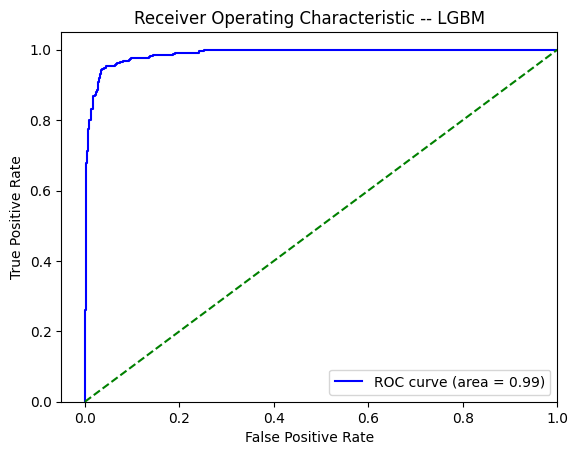

In [27]:
#Implementing the LGBM Model
start = timer.time()
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_lgbm = lgbm_model.predict(X_test_std)
y_lgbm_prob = lgbm_model.predict_proba(X_test_std)

prec_lgbm, rec_lgbm, f1_lgbm, sens_lgbm, spec_lgbm, auc_lgbm = model_Summary("LGBM", y_test, y_lgbm, y_lgbm_prob)

#XGB

Finished training within 0.15 seconds
Summary for model :: XGB
Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       487
           1       0.93      0.97      0.95       486

    accuracy                           0.95       973
   macro avg       0.95      0.95      0.95       973
weighted avg       0.95      0.95      0.95       973

Confusion matrix: 
[[453  34]
 [ 16 470]]
Accuracy score: 0.95
Precision score: 0.93
Recall score: 0.97
F1 score: 0.95
Sensitivity score: 0.97
Specitivity score: 0.93
AUC score: 0.99


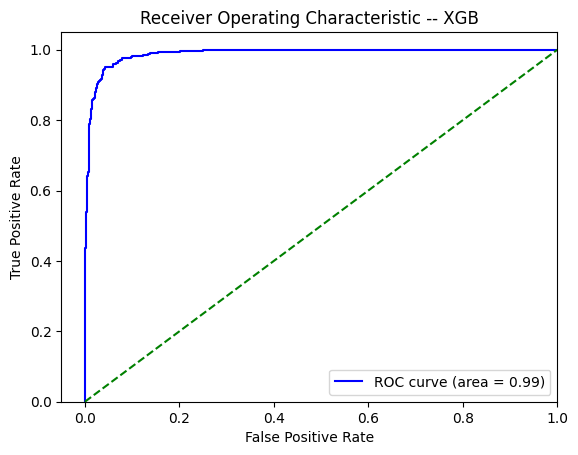

In [28]:
#Implementing the XGBoost Model
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))

y_xgb = xgb_model.predict(X_test_std)
y_xgb_prob = xgb_model.predict_proba(X_test_std)

prec_xgb, rec_xgb, f1_xgb, sens_xgb, spec_xgb, auc_xgb = model_Summary("XGB", y_test, y_xgb, y_xgb_prob)

#Analysis

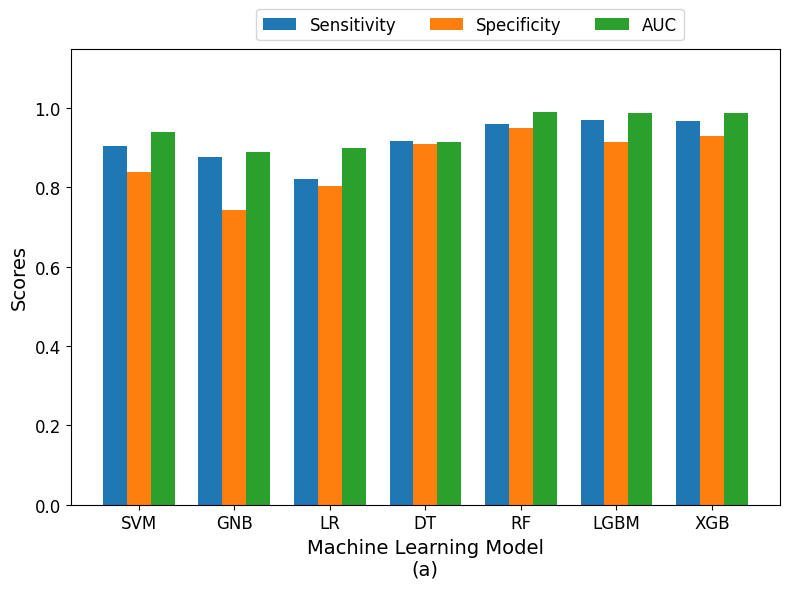

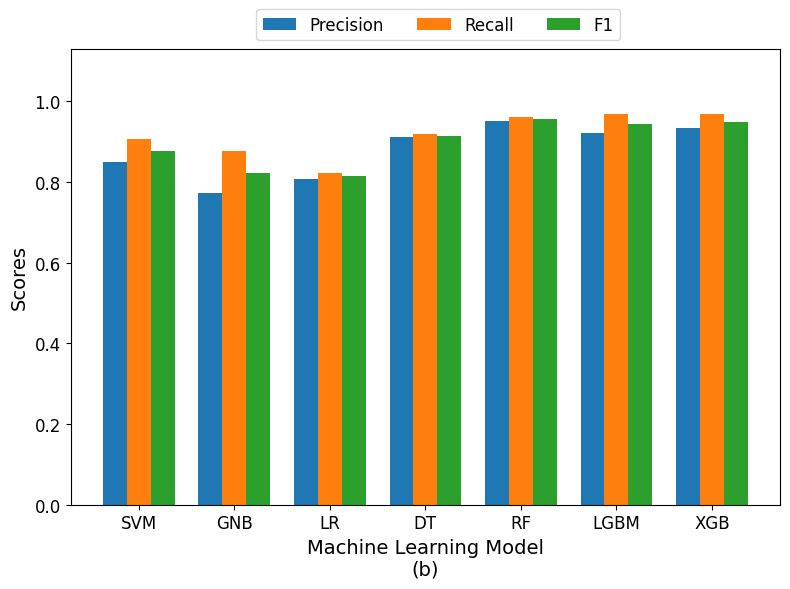

In [29]:
#plotting all models metrices at one place
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'LGBM', 'XGB']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_lgbm, sens_xgb]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_lgbm, spec_xgb]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor, auc_lgbm, auc_xgb]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_lgbm, prec_xgb]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_lgbm, rec_xgb]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_lgbm, f1_xgb]


width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, axes = plt.subplots(figsize=(8,6))
bar1 = axes.bar(r1, sens_all, width, label='Sensitivity')
bar2 = axes.bar(r2, spec_all, width, label='Specificity')
bar3 = axes.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
axes.set_ylim([0,1.15])
axes.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
axes.set_xticks(r2)
axes.set_xticklabels(ml_names)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
axes.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)

fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, axes = plt.subplots(figsize=(8,6))
bar1 = axes.bar(r1, prec_all, width, label='Precision')
bar2 = axes.bar(r2, rec_all, width, label='Recall')
bar3 = axes.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
axes.set_ylim([0,1.13])
axes.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
axes.set_xticks(r2)
axes.set_xticklabels(ml_names)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
axes.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)

fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()

<ipython-input-30-9388b52e97cd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
<ipython-input-30-9388b52e97cd>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes3.set_yticklabels(feature_names[xgb_tree_sort_idx])


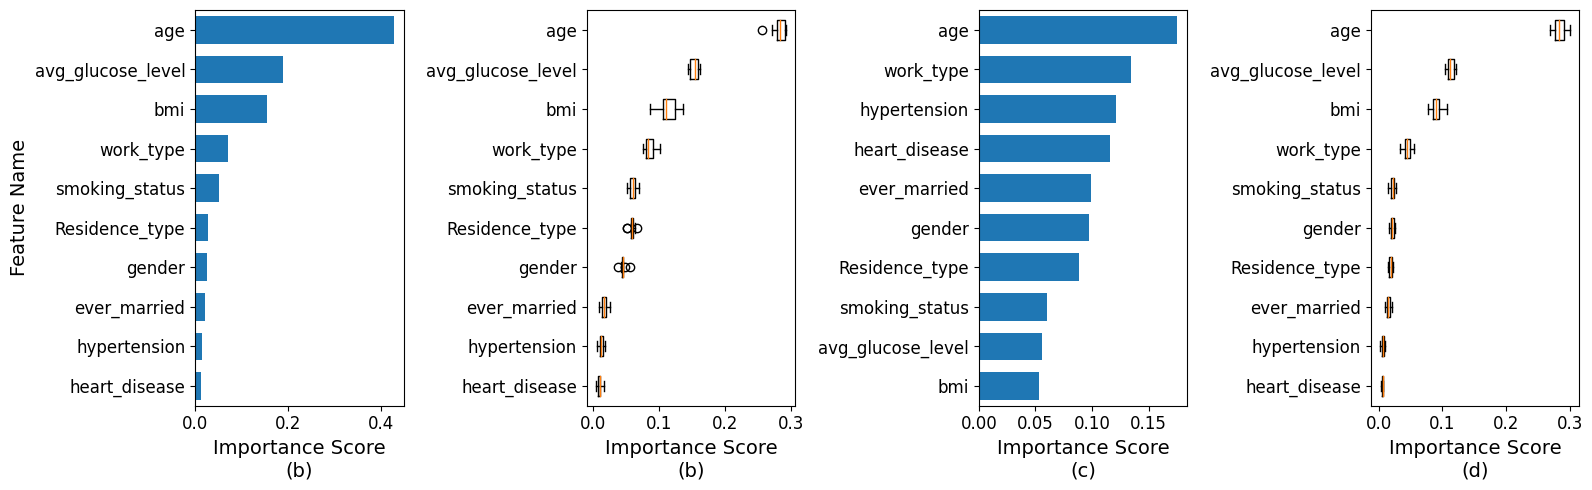

In [30]:
# feature importance from random forest
feature_names = transformed_data.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test_std, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

#selecting most important performaces
fig, (axes1, axes2, axes3, axes4) = plt.subplots(1, 4, figsize=(16, 5))
axes1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
axes1.tick_params(axis='both', which='major', labelsize=12)
axes1.set_xlabel("Importance Score\n(b)",fontsize=14)
axes1.set_ylabel("Feature Name",fontsize=14)
axes1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
axes1.set_yticks(ranfor_indices)
axes1.set_ylim((0, len(ranfor_model.feature_importances_)))
axes2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
axes2.tick_params(axis='both', which='major', labelsize=12)
axes2.set_xlabel("Importance Score\n(b)",fontsize=14)

# feature importance from XGBoost
xgb_perm_imp = permutation_importance(xgb_model, X_test_std, y_test, n_repeats=10, random_state=42)
xgb_perm_sort_idx = xgb_perm_imp.importances_mean.argsort()

xgb_tree_sort_idx = np.argsort(xgb_model.feature_importances_)
xgb_indices = np.arange(0, len(xgb_model.feature_importances_)) + 0.5

axes3.barh(xgb_indices,xgb_model.feature_importances_[xgb_tree_sort_idx], height=0.7)
axes3.tick_params(axis='both', which='major', labelsize=12)
axes3.set_xlabel("Importance Score\n(c)",fontsize=14)
axes3.set_yticklabels(feature_names[xgb_tree_sort_idx])
axes3.set_yticks(xgb_indices)
axes3.set_ylim((0, len(xgb_model.feature_importances_)))
axes4.boxplot(xgb_perm_imp.importances[xgb_perm_sort_idx].T,vert=False,labels=feature_names[xgb_perm_sort_idx])
axes4.tick_params(axis='both', which='major', labelsize=12)
axes4.set_xlabel("Importance Score\n(d)",fontsize=14)
fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()